In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pulp
import sys
import os
import importlib.util
import importlib
import gurobipy as gp

# モジュールを強制的に再ロード（古いキャッシュをクリア）
if 'code' in sys.modules:
    del sys.modules['code']
# サブモジュールも削除
for module_name in list(sys.modules.keys()):
    if module_name.startswith('code.'):
        del sys.modules[module_name]

current_dir = os.getcwd()
spec = importlib.util.spec_from_file_location("code", os.path.join(current_dir, "code", "__init__.py"))
code_module = importlib.util.module_from_spec(spec)
sys.modules["code"] = code_module
spec.loader.exec_module(code_module)

# サブモジュールも再ロード
importlib.reload(code_module)

make_tensor_grid_2d = code_module.make_tensor_grid_2d
make_tensor_grid_3d = code_module.make_tensor_grid_3d
product_beta_density = code_module.product_beta_density
solve_mechanism = code_module.solve_mechanism
solve_mechanism_iterative = code_module.solve_mechanism_iterative
solve_dual = code_module.solve_dual
discretize_signed_measure = code_module.discretize_signed_measure
build_cost_matrix = code_module.build_cost_matrix
classify_region = code_module.classify_region
plot_polyhedral_regions = code_module.plot_polyhedral_regions
save_results = code_module.save_results
load_results = code_module.load_results

print("モジュールを再ロードしました")

モジュールを再ロードしました


In [3]:
home_license = os.path.expanduser('~/gurobi.lic')
os.environ['GRB_LICENSE_FILE'] = home_license

SOLVER = pulp.GUROBI(msg=True)

# ケース1

In [3]:
# ケース1: 財a, 財b, シナジーはBeta(1,1)
NX, NY, NZ = 25, 25, 25
BETA_PARAMS = [
    (1.0, 1.0),
    (1.0, 1.0),
    (1.0, 1.0),
]

points, weights = make_tensor_grid_3d(NX, NY, NZ, BETA_PARAMS)
print(f"#types = {len(points)}")

#types = 15625


In [5]:
status, obj_val, u_sol, p_sol, n_iter = solve_mechanism_iterative(
    points, weights, grid_sizes=(NX, NY, NZ), solver=SOLVER
)

print("LP status:", status)
print("Optimal revenue:", obj_val)
print(f"Number of iterations: {n_iter}")

# 結果を保存
filepath_case1 = save_results(
    points, weights, u_sol, p_sol, obj_val, status,
    grid_sizes=(NX, NY, NZ),
    n_iter=n_iter,
    filename="results_case1.npz"
)


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 136875 rows, 62500 columns and 379375 nonzeros (Max)
Model fingerprint: 0x44a48239
Model has 62500 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [1e-06, 6e-05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.10s
Presolved: 136868 rows, 62500 columns, 379410 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time

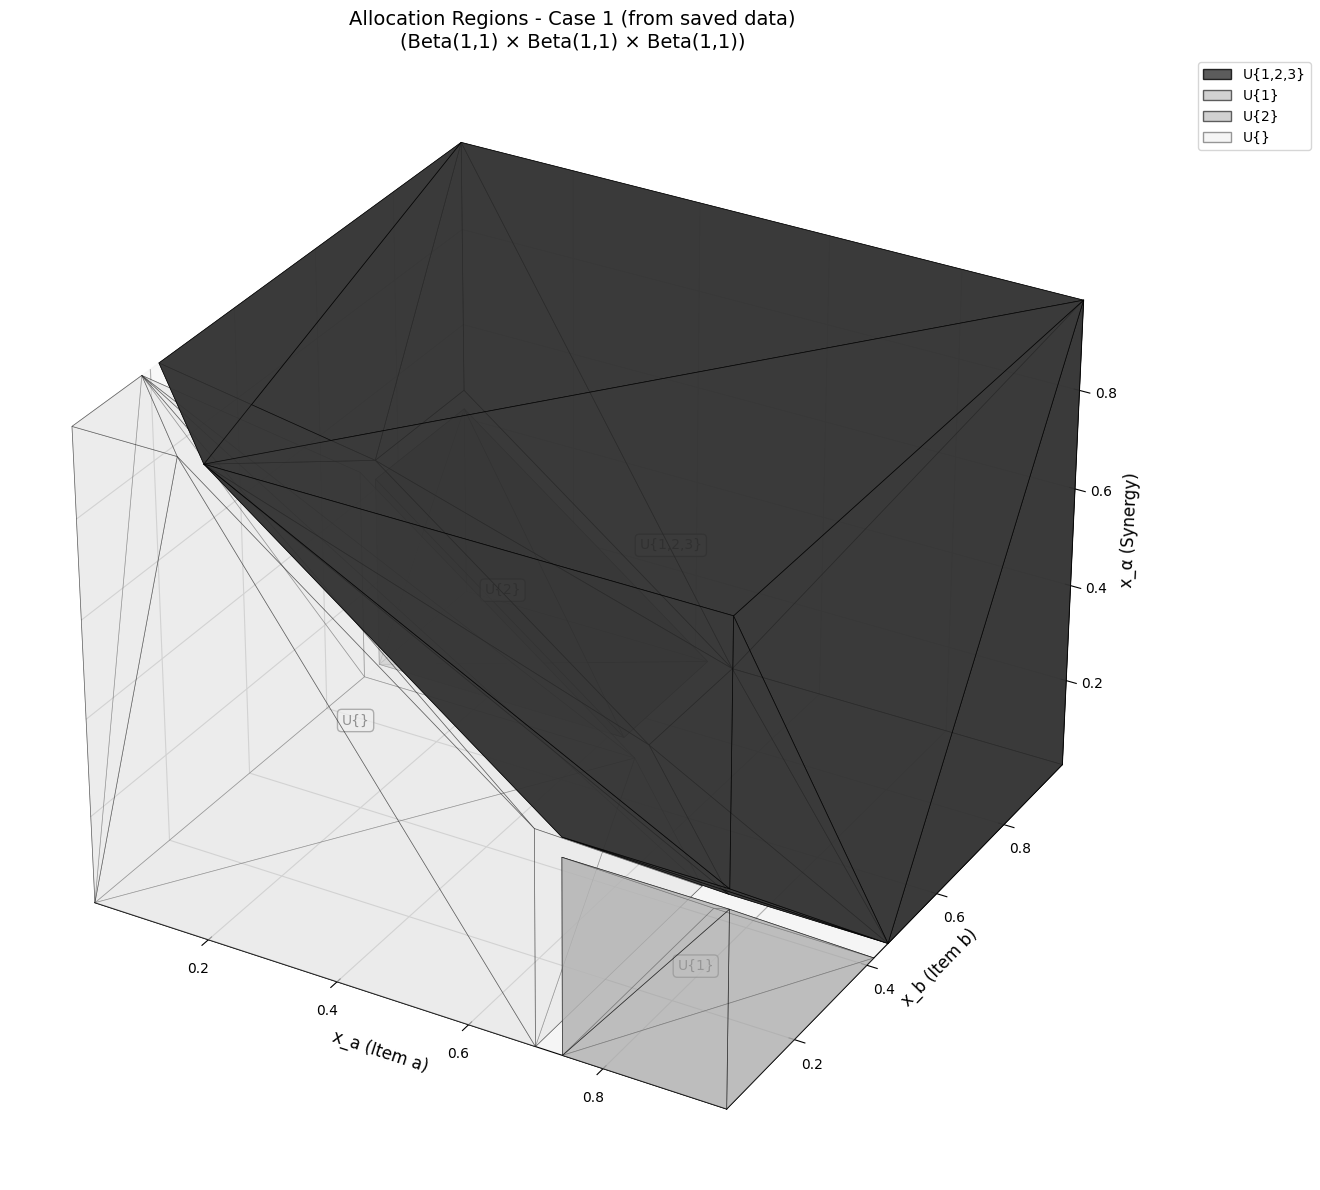

領域の統計:
  U{1,2,3}: 10798 点
  U{1}: 462 点
  U{2}: 462 点
  U{}: 3903 点


In [4]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case1.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 1 (from saved data)\n(Beta(1,1) × Beta(1,1) × Beta(1,1))"
)


# ケース2

In [5]:
# ケース2: 財a, 財bはBeta(1,1)、シナジーαはU[-1,0]
NX2, NY2, NZ2 = 25, 25, 25
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (-1, 0)},
]

In [4]:
points2, weights2 = make_tensor_grid_3d(NX2, NY2, NZ2, BETA_PARAMS_MIXED)
print(f"#types = {len(points2)}")
print("ex. first point, weight =", points2[0], weights2[0])

status2, obj_val2, u_sol2, p_sol2, n_iter2 = solve_mechanism_iterative(
    points2, weights2, grid_sizes=(NX2, NY2, NZ2), solver=SOLVER
)

print("LP status:", status2)
print("Optimal revenue:", obj_val2)
print(f"Number of iterations: {n_iter2}")

# 結果を保存
filepath_case2 = save_results(
    points2, weights2, u_sol2, p_sol2, obj_val2, status2,
    grid_sizes=(NX2, NY2, NZ2),
    n_iter=n_iter2,
    filename="results_case2.npz"
)


#types = 15625
ex. first point, weight = (0.02, 0.02, -0.98) 6.399999999999998e-05
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 136875 rows, 62500 columns and 379375 nonzeros (Max)
Model fingerprint: 0x1b14c467
Model has 62500 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [1e-06, 6e-05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.10s
Presolved: 136868 rows, 62500 columns, 379410 nonzeros

Concurrent LP optimizer: p

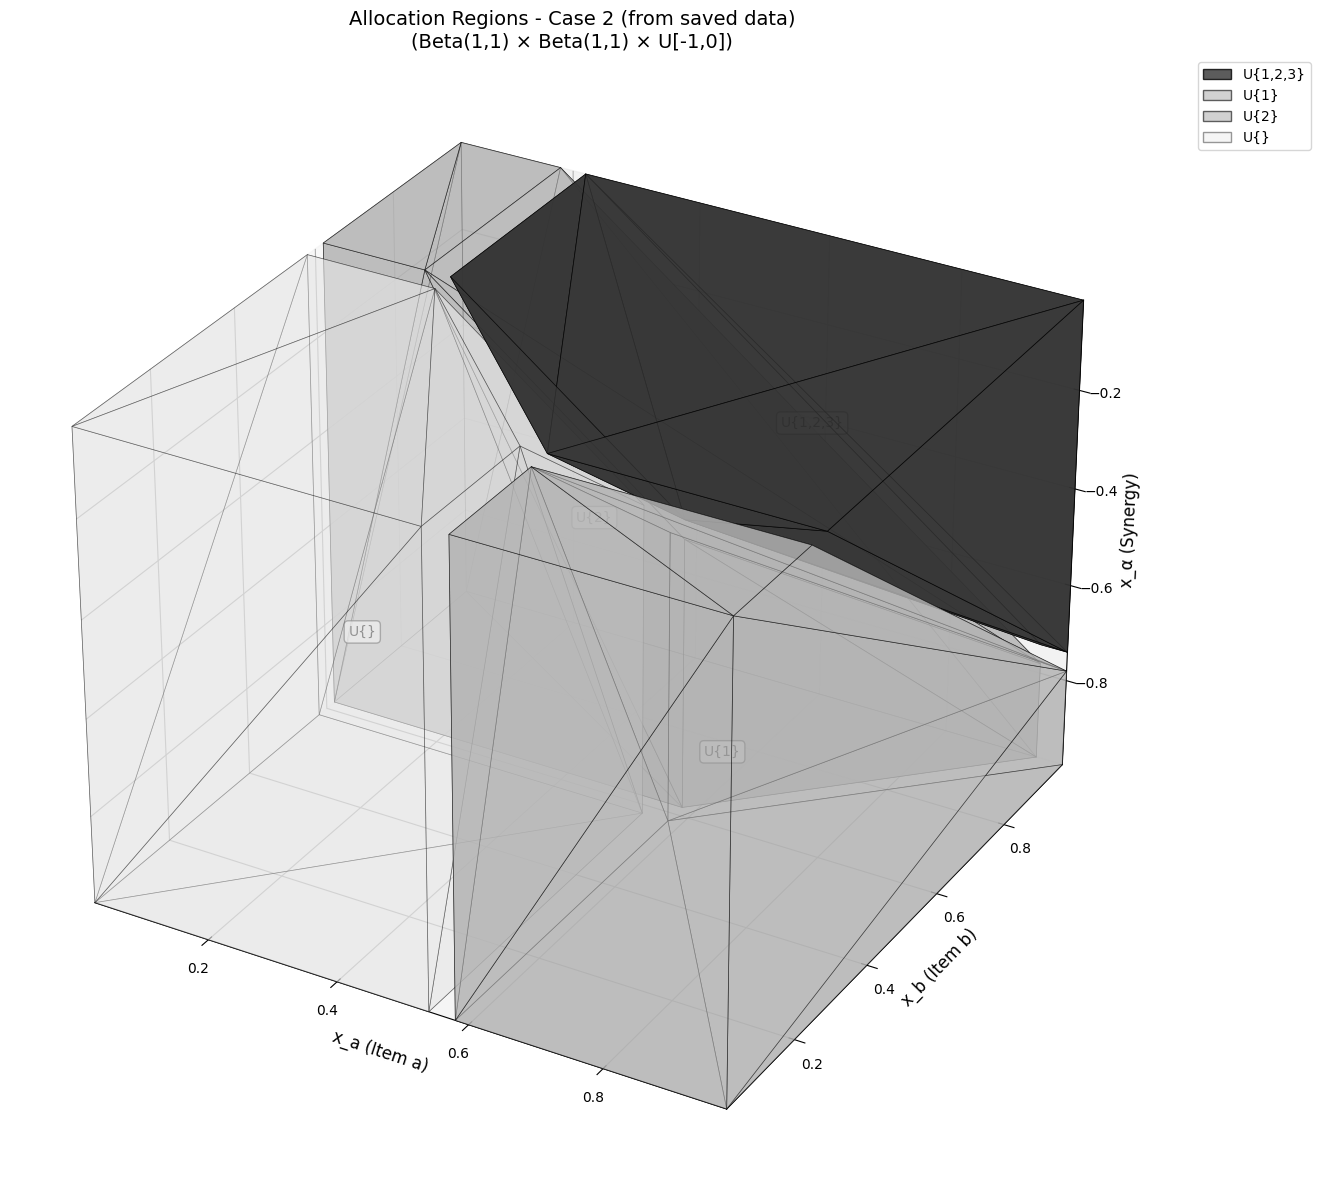

領域の統計:
  U{1,2,3}: 2495 点
  U{1}: 4290 点
  U{2}: 3710 点
  U{}: 5130 点


In [6]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case2.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 2 (from saved data)\n(Beta(1,1) × Beta(1,1) × U[-1,0])"
)


# ケース3

In [7]:
# ケース3: 財a, 財bはBeta(1,1)、シナジーαはU[-1,1]
NX3, NY3, NZ3 = 25, 25, 50
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (-1, 1)},
]

In [ ]:
points3, weights3 = make_tensor_grid_3d(NX3, NY3, NZ3, BETA_PARAMS_MIXED)
print(f"#types = {len(points3)}")
print("ex. first point, weight =", points3[0], weights3[0])

status3, obj_val3, u_sol3, p_sol3, n_iter3 = solve_mechanism_iterative(
    points3, weights3, grid_sizes=(NX3, NY3, NZ3), solver=SOLVER
)

print("LP status:", status3)
print("Optimal revenue:", obj_val3)
print(f"Number of iterations: {n_iter3}")

# 結果を保存
filepath_case3 = save_results(
    points3, weights3, u_sol3, p_sol3, obj_val3, status3,
    grid_sizes=(NX3, NY3, NZ3),
    n_iter=n_iter3,
    filename="results_case3.npz"
)

#types = 31250
ex. first point, weight = (0.02, 0.02, -0.98) 3.2e-05
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 411875 rows, 187500 columns and 1141875 nonzeros (Max)
Model has 187500 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [6e-07, 6e-05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
LP warm-start: use basis

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1368685e+00   1.862500e+04   0.000000e+00      0s
   58341    1.7151270e+00   1.401427e+05   0.000000e+00      5s
   74712    1.6519449e+00   8.280197e+06   0.000000e+00     10s
   81800    1.6336545e+00   1.130176e+06   0.000000e+00     15s
   87044    1.6227160e+

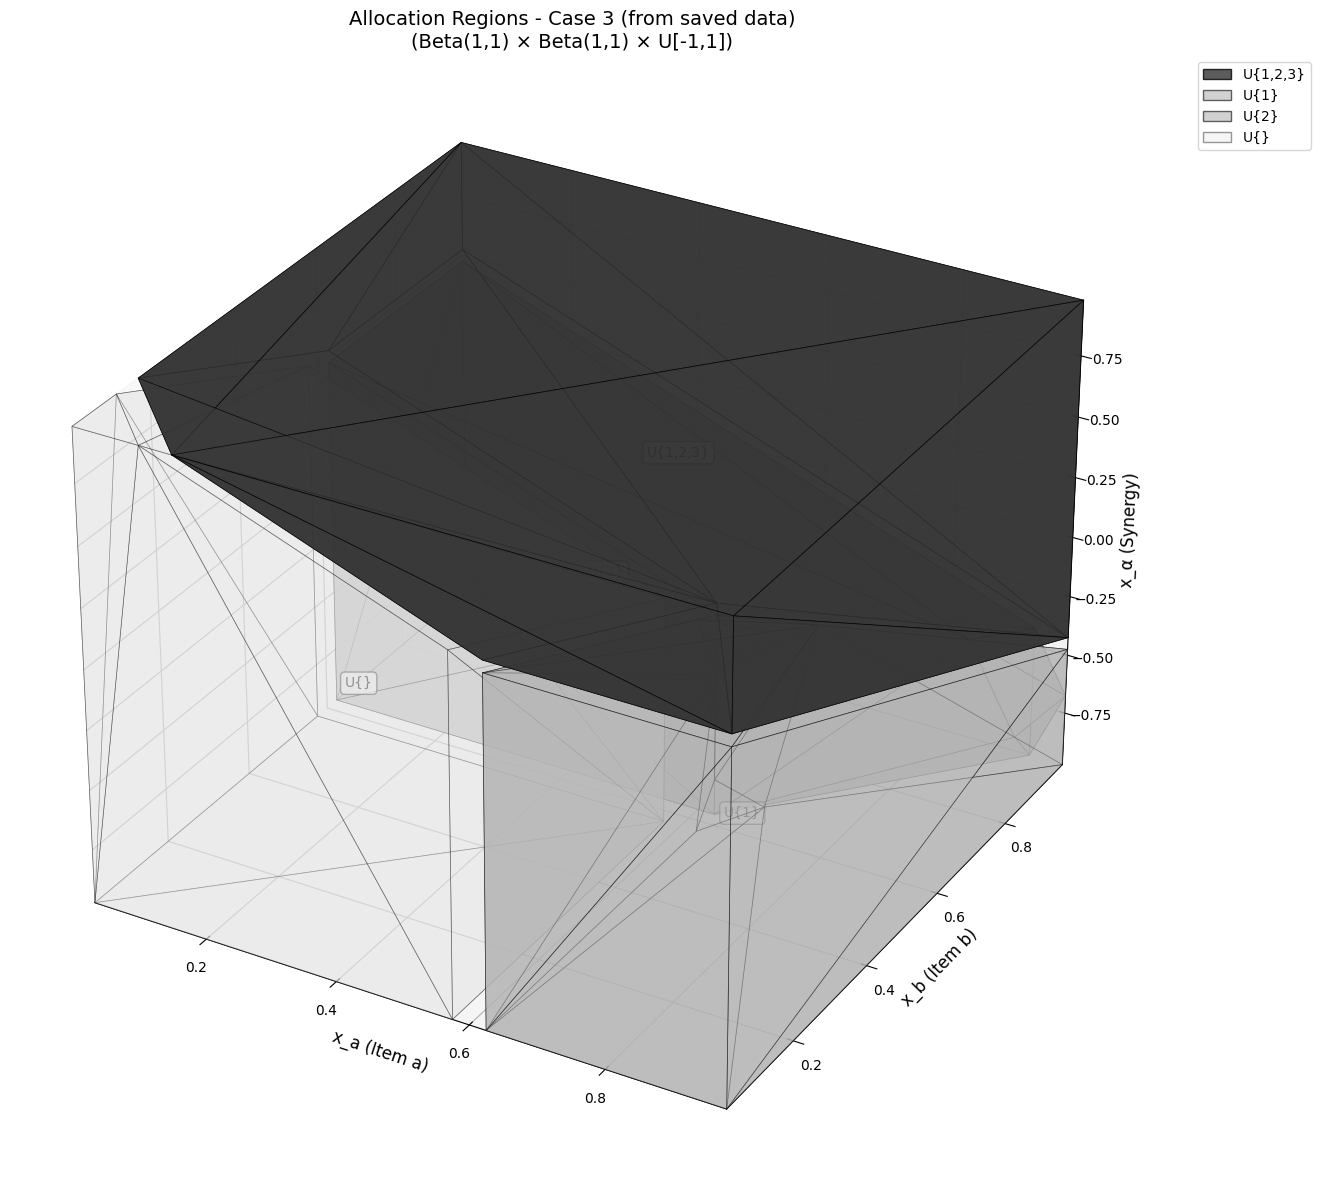

領域の統計:
  U{1,2,3}: 5824 点
  U{1}: 2885 点
  U{2}: 2831 点
  U{}: 4460 点


In [8]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case3.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 3 (from saved data)\n(Beta(1,1) × Beta(1,1) × U[-1,1])"
)


# ケース4:

In [ ]:
# ケース4: 財a, 財bはBeta(1,1)、シナジーαはU[0,0.5]
NX4, NY4, NZ4 = 30, 30, 15
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (0, 0.5)},
]

In [ ]:
points4, weights4 = make_tensor_grid_3d(NX4, NY4, NZ4, BETA_PARAMS_MIXED)
print(f"#types = {len(points4)}")
print("ex. first point, weight =", points4[0], weights4[0])

status4, obj_val4, u_sol4, p_sol4, n_iter4 = solve_mechanism_iterative(
    points4, weights4, grid_sizes=(NX4, NY4, NZ4), solver=SOLVER
)

print("LP status:", status4)
print("Optimal revenue:", obj_val4)
print(f"Number of iterations: {n_iter4}")

# 結果を保存
filepath_case4 = save_results(
    points4, weights4, u_sol4, p_sol4, obj_val4, status4,
    grid_sizes=(NX4, NY4, NZ4),
    n_iter=n_iter4,
    filename="results_case4.npz"
)


#types = 13500
ex. first point, weight = (0.016666666666666666, 0.016666666666666666, 0.016666666666666666) 7.407407407407407e-05
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 235800 rows, 108000 columns and 653400 nonzeros (Max)
Model fingerprint: 0xbe9fb85a
Model has 108000 linear objective coefficients
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e-06, 7e-05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 14 rows and 0 columns
Presolve time: 0.15s
Presolved: 235786 rows, 108000 columns, 653470 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.56s

Barrier statistics:
 AA' NZ     : 1.972e+05


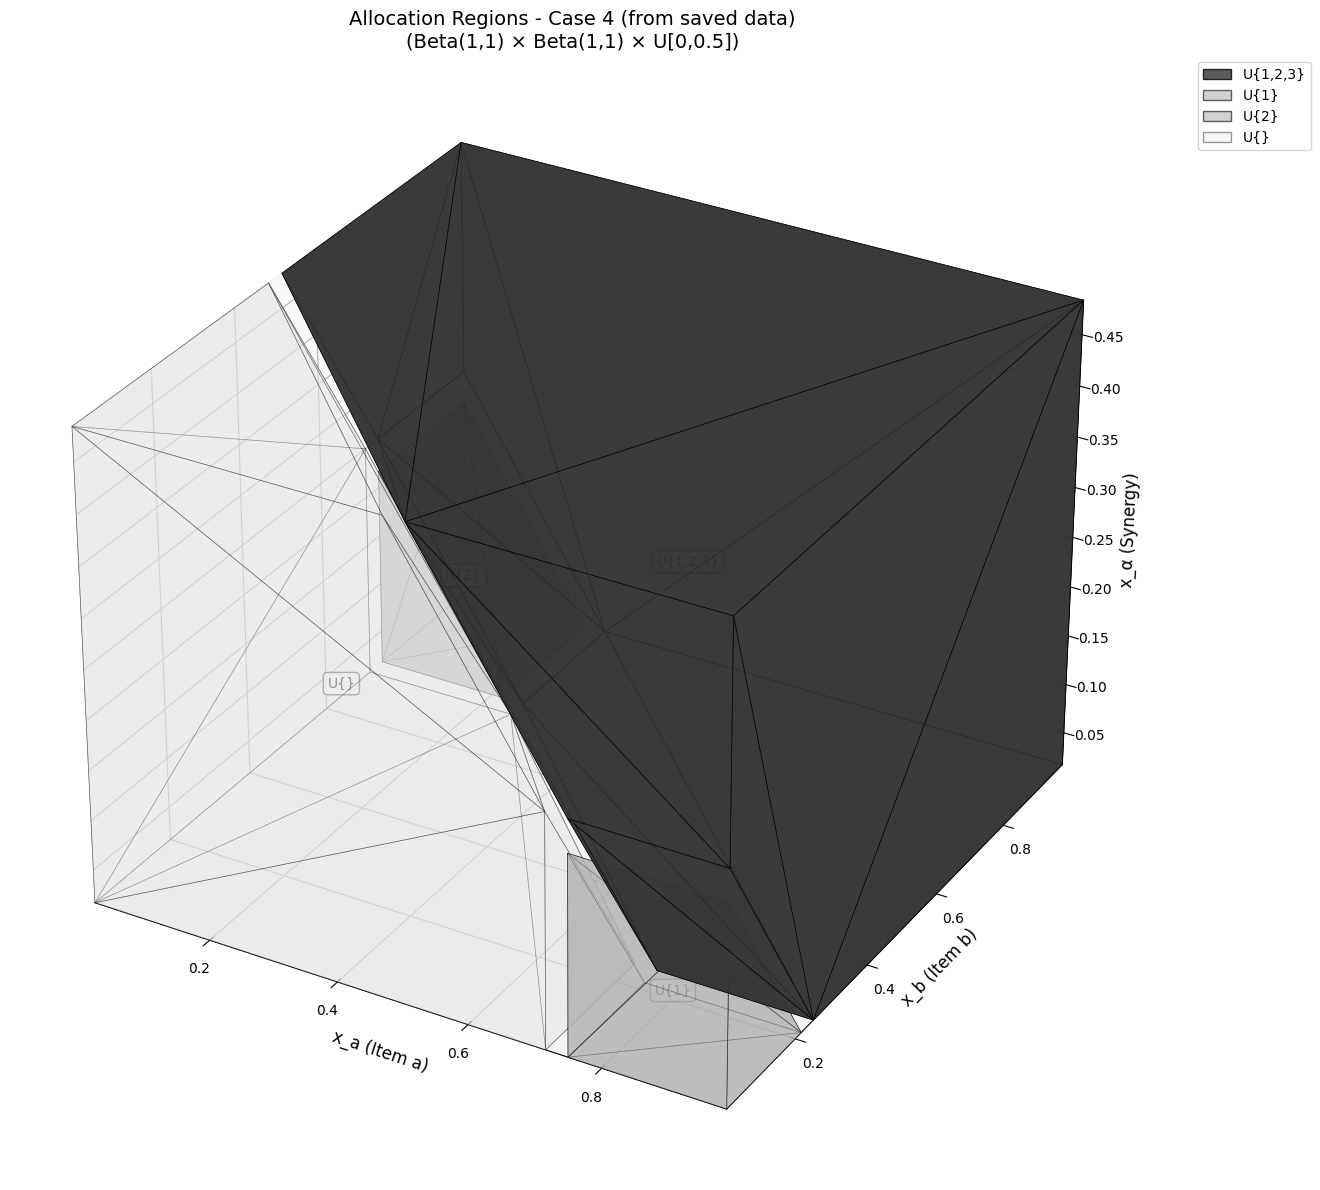

領域の統計:
  U{1,2,3}: 9285 点
  U{1}: 224 点
  U{2}: 224 点
  U{}: 3767 点


In [13]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case4.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 4 (from saved data)\n(Beta(1,1) × Beta(1,1) × U[0,0.5])"
)

# ケース5

In [ ]:
# ケース5: 財a, 財bはBeta(1,1)、シナジーαはU[-0.5,0]
NX5, NY5, NZ5 = 20, 20, 10
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (-0.5, 0)},
]

In [ ]:
points5, weights5 = make_tensor_grid_3d(NX5, NY5, NZ5, BETA_PARAMS_MIXED)
print(f"#types = {len(points5)}")
print("ex. first point, weight =", points5[0], weights5[0])

status5, obj_val5, u_sol5, p_sol5, n_iter5 = solve_mechanism_iterative(
    points5, weights5, grid_sizes=(NX5, NY5, NZ5), solver=SOLVER
)

print("LP status:", status5)
print("Optimal revenue:", obj_val5)
print(f"Number of iterations: {n_iter5}")

# 結果を保存
filepath_case5 = save_results(
    points5, weights5, u_sol5, p_sol5, obj_val5, status5,
    grid_sizes=(NX5, NY5, NZ5),
    n_iter=n_iter5,
    filename="results_case5.npz"
)


#types = 4000
ex. first point, weight = (0.025, 0.025, -0.475) 0.00024999999999999995
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 270200 rows, 124000 columns and 748600 nonzeros (Max)
Model has 124000 linear objective coefficients
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [1e-06, 2e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
LP warm-start: use basis

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4482593e+00   4.380000e+03   0.000000e+00      0s
   17404    1.9272997e+00   4.641471e+02   0.000000e+00      5s
   22861    1.9266048e+00   0.000000e+00   0.000000e+00      9s

Solved in 22861 iterations and 9.27 seconds (15.14 work units)
Optimal

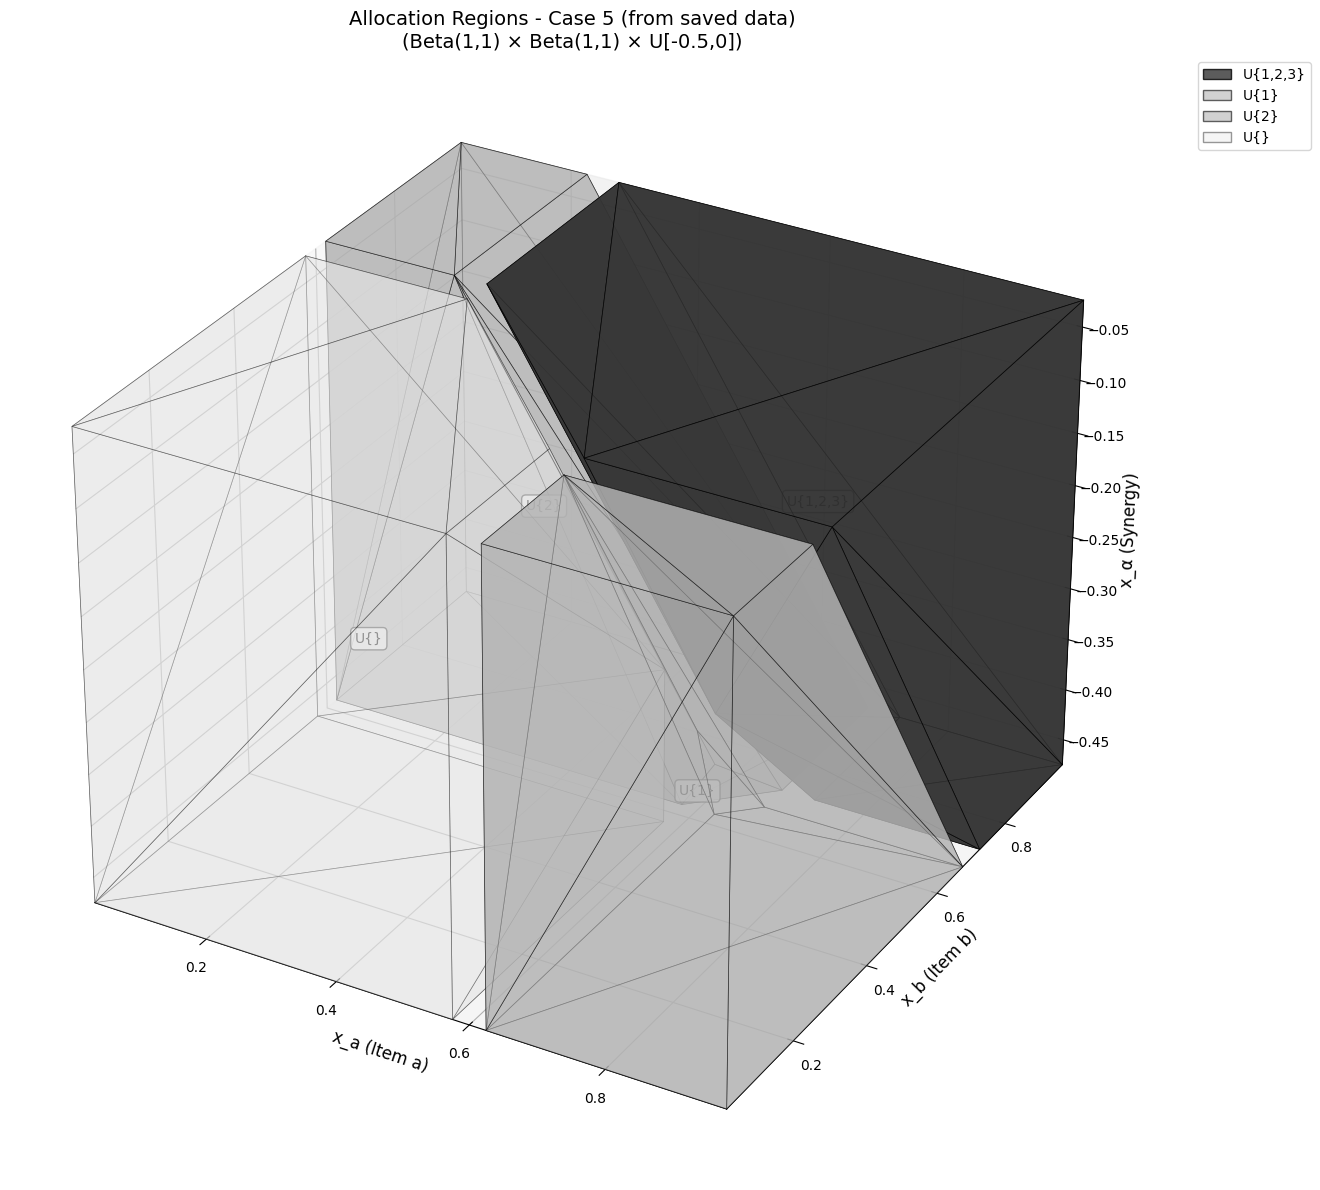

領域の統計:
  U{1,2,3}: 1101 点
  U{1}: 758 点
  U{2}: 757 点
  U{}: 1384 点


In [ ]:
# 保存されたデータから読み込んで可視化
data = load_results("data/results_case5.npz")
plot_polyhedral_regions(
    data['points'], data['p_sol'], data['p_sol'][2, :],
    title="Allocation Regions - Case 5 (from saved data)\n(Beta(1,1) × Beta(1,1) × U[-0.5,0])"
)